In [1]:
pip install black

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [4]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Load the Data

In [7]:
data = pd.read_csv("Loan_Delinquent_Dataset.csv")
# copying data to another varaible to avoid any changes to original data
loan = data.copy()
#View a snippet of the data
loan.head()

ID  isDelinquent       term  gender purpose home_ownership    age     FICO
0   1             1  36 months  Female   House       Mortgage    >25  300-500
1   2             0  36 months  Female   House           Rent  20-25     >500
2   3             1  36 months  Female   House           Rent    >25  300-500
3   4             1  36 months  Female     Car       Mortgage    >25  300-500
4   5             1  36 months  Female   House           Rent    >25  300-500

In [8]:
loan.tail()

ID  isDelinquent       term  gender   purpose home_ownership    age  \
11543  11544             0  60 months    Male     other       Mortgage    >25   
11544  11545             1  36 months    Male     House           Rent  20-25   
11545  11546             0  36 months  Female  Personal       Mortgage  20-25   
11546  11547             1  36 months  Female     House           Rent  20-25   
11547  11548             1  36 months    Male  Personal       Mortgage  20-25   

          FICO  
11543  300-500  
11544  300-500  
11545     >500  
11546  300-500  
11547  300-500

## The shape of the data

In [9]:
loan .shape

(11548, 8)

## Check the data types of the columsn

In [11]:
loan.dtypes

ID                 int64
isDelinquent       int64
term              object
gender            object
purpose           object
home_ownership    object
age               object
FICO              object
dtype: object

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


## Summary ofthe Data Set

In [13]:
loan.describe(include="all")

ID  isDelinquent       term gender purpose home_ownership  \
count   11548.000000  11548.000000      11548  11548   11548          11548   
unique           NaN           NaN          2      2       7              3   
top              NaN           NaN  36 months   Male   House       Mortgage   
freq             NaN           NaN      10589   6555    6892           5461   
mean     5774.500000      0.668601        NaN    NaN     NaN            NaN   
std      3333.764789      0.470737        NaN    NaN     NaN            NaN   
min         1.000000      0.000000        NaN    NaN     NaN            NaN   
25%      2887.750000      0.000000        NaN    NaN     NaN            NaN   
50%      5774.500000      1.000000        NaN    NaN     NaN            NaN   
75%      8661.250000      1.000000        NaN    NaN     NaN            NaN   
max     11548.000000      1.000000        NaN    NaN     NaN            NaN   

          age     FICO  
count   11548    11548  
unique      2        2  
top     20-25  300-500  
freq     5888     6370  
mean      NaN      NaN  
std       NaN      NaN  
min       NaN      NaN  
25%       NaN      NaN  
50%       NaN      NaN  
75%       NaN      NaN  
max       NaN      NaN

In [14]:
# checking for unique values in ID column
loan["ID"].nunique()

11548

- All the values in the ID column are unique. Not helpful so we will drop it.
- isDeliquent appears to be the dependent variable and it is an integer

In [15]:
loan.drop(["ID"], axis=1, inplace=True)

## Check for missing values

In [16]:
loan.isna().sum()

isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

- There are no missing values

## Exploratory Data Analysis

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

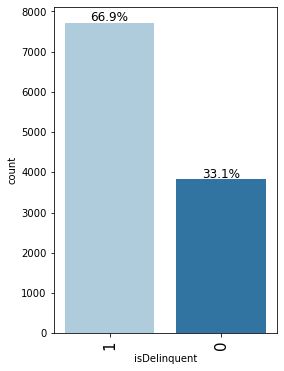

In [19]:
labeled_barplot(loan, "isDelinquent", perc=True)

67% of the customers aredeliquent

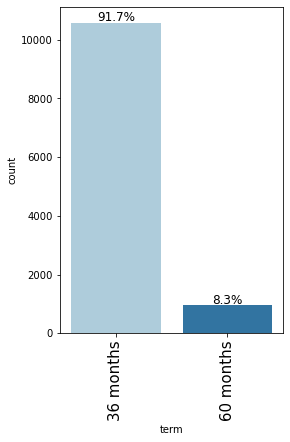

In [20]:
labeled_barplot(loan, "term", perc=True)

- 92% of the loans are for 36 months.

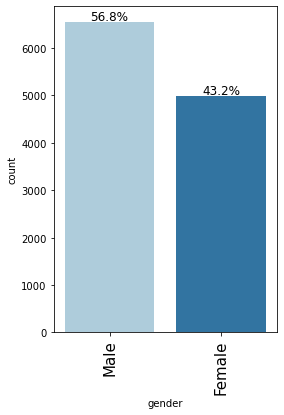

In [22]:
labeled_barplot(loan, "gender", perc=True)

- There are more male than female applicants

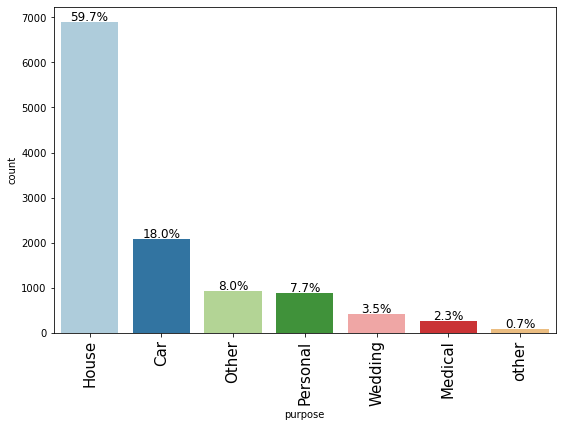

In [24]:
labeled_barplot(loan, "purpose", perc=True)

- Most of the loans are for house loans
- We can merge the "other" and "Other" categories

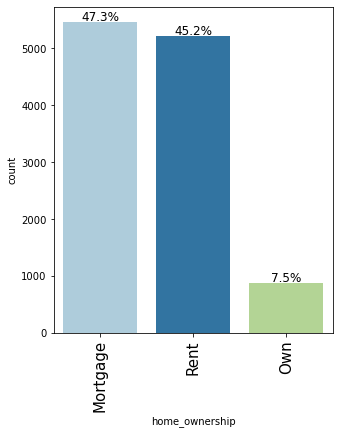

In [25]:
labeled_barplot(loan, "home_ownership", perc=True)

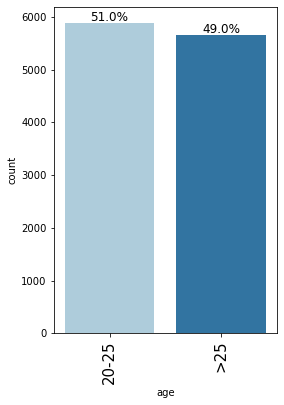

In [26]:
labeled_barplot(loan, "age", perc=True)

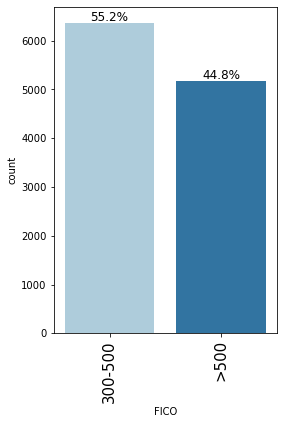

In [27]:
labeled_barplot(loan, "FICO", perc=True)

- Most customers have a FICO score of between 300 to 500

In [28]:
loan["purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other'],
      dtype=object)

In [29]:
loan["purpose"].replace("other", "Other", inplace=True)

In [30]:
loan["purpose"].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical'],
      dtype=object)

### Bivariate Analysis

isDelinquent     0     1    All
term                           
All           3827  7721  11548
36 months     3168  7421  10589
60 months      659   300    959
------------------------------------------------------------------------------------------------------------------------


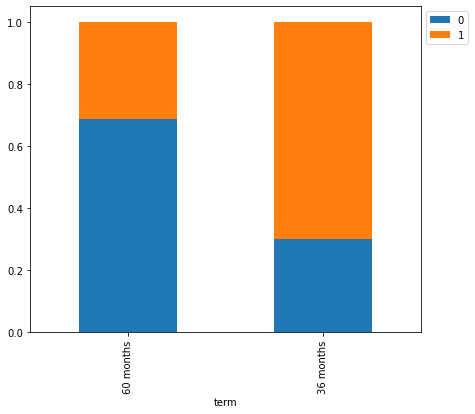

In [31]:
stacked_barplot(loan, "term", "isDelinquent")

- Most defaulters are those with 36 month term loans

isDelinquent     0     1    All
gender                         
All           3827  7721  11548
Male          1977  4578   6555
Female        1850  3143   4993
------------------------------------------------------------------------------------------------------------------------


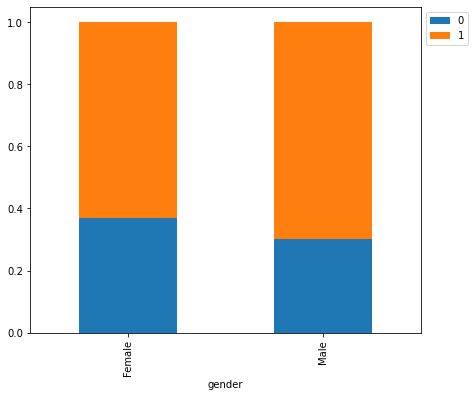

In [33]:
stacked_barplot(loan, "gender", "isDelinquent")

isDelinquent     0     1    All
purpose                        
All           3827  7721  11548
House         2272  4620   6892
Car            678  1402   2080
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
Medical        107   159    266
------------------------------------------------------------------------------------------------------------------------


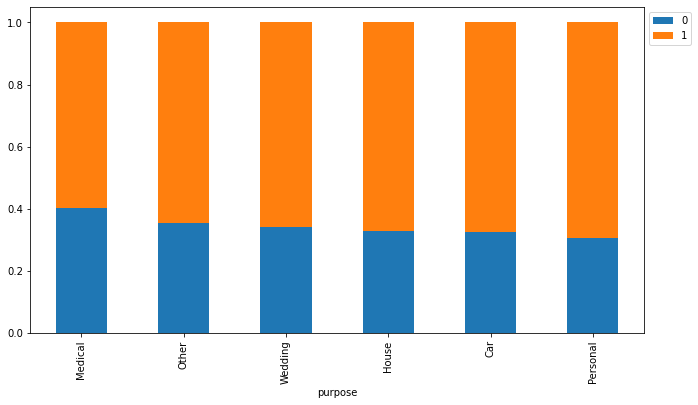

In [34]:
stacked_barplot(loan, "purpose", "isDelinquent")

isDelinquent       0     1    All
home_ownership                   
All             3827  7721  11548
Mortgage        1831  3630   5461
Rent            1737  3479   5216
Own              259   612    871
------------------------------------------------------------------------------------------------------------------------


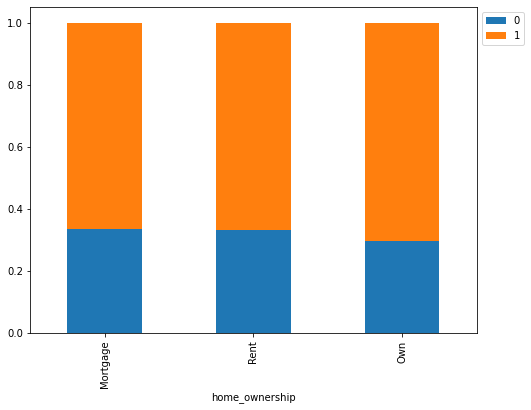

In [35]:
stacked_barplot(loan, "home_ownership", "isDelinquent")

isDelinquent     0     1    All
age                            
All           3827  7721  11548
>25           1969  3691   5660
20-25         1858  4030   5888
------------------------------------------------------------------------------------------------------------------------


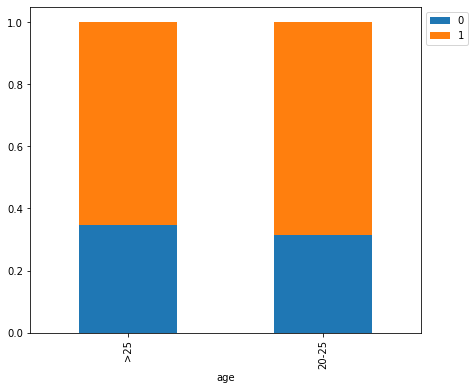

In [36]:
stacked_barplot(loan, "age", "isDelinquent")

isDelinquent     0     1    All
FICO                           
All           3827  7721  11548
>500          2886  2292   5178
300-500        941  5429   6370
------------------------------------------------------------------------------------------------------------------------


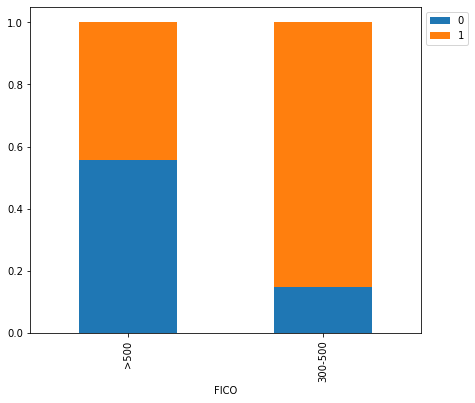

In [37]:
stacked_barplot(loan, "FICO", "isDelinquent")

- Customers with a FICO score of more than 500 have lower chances of defaulting on their loans

FICO            300-500  >500    All
home_ownership                      
All                6370  5178  11548
Mortgage           2857  2604   5461
Rent               3033  2183   5216
Own                 480   391    871
------------------------------------------------------------------------------------------------------------------------


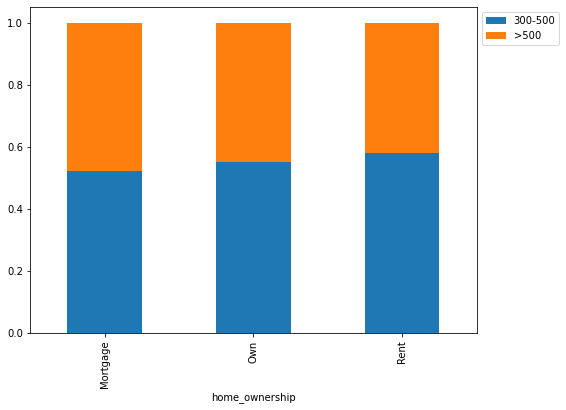

In [38]:
stacked_barplot(loan, "home_ownership", "FICO")

FICO   300-500  >500    All
age                        
All       6370  5178  11548
>25       2443  3217   5660
20-25     3927  1961   5888
------------------------------------------------------------------------------------------------------------------------


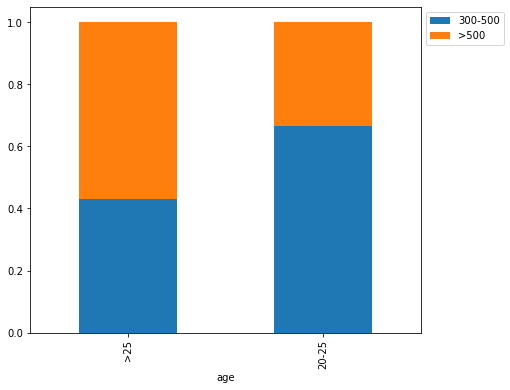

In [39]:
stacked_barplot(loan, "age", "FICO")

FICO    300-500  >500    All
gender                      
All        6370  5178  11548
Male       3705  2850   6555
Female     2665  2328   4993
------------------------------------------------------------------------------------------------------------------------


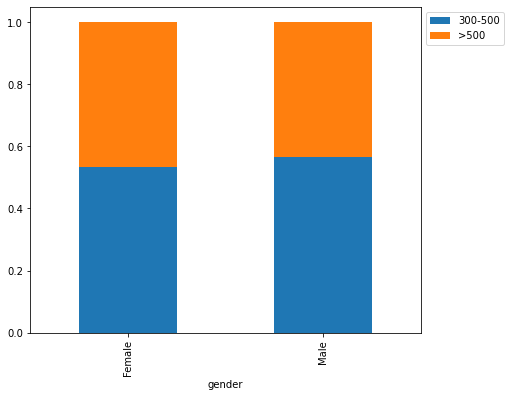

In [40]:
stacked_barplot(loan, "gender", "FICO")

## Data Preprocessing

In [42]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

term_60 months  gender_Male  purpose_House  purpose_Medical  purpose_Other  \
0               0            0              1                0              0   
1               0            0              1                0              0   
2               0            0              1                0              0   
3               0            0              0                0              0   
4               0            0              1                0              0   

   purpose_Personal  purpose_Wedding  home_ownership_Own  home_ownership_Rent  \
0                 0                0                   0                    0   
1                 0                0                   0                    1   
2                 0                0                   0                    1   
3                 0                0                   0                    0   
4                 0                0                   0                    1   

   age_>25  FICO_>500  
0        1          0  
1        0          1  
2        1          0  
3        1          0  
4        1          0

### Splitting the data into x and y variables

In [41]:
X = loan.drop(["isDelinquent"], axis=1)
y = loan["isDelinquent"]

### Splitting the Data into Train and Test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [44]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6928
Number of rows in test data = 4620


## Model Building

### Decision Tree Model

In [45]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Model Performance Evaluation 
- Recall Should be maximized to prevent loss of money to customers who might default

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Perfomance on Training set

In [48]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision        F1
0  0.855514  0.9088   0.881563  0.894974

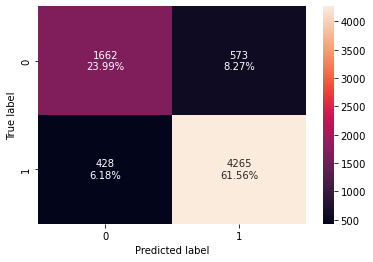

In [49]:
confusion_matrix_sklearn(model, X_train, y_train)

### Model Perfomance on Test set

In [50]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.843723  0.897292   0.868606  0.882716

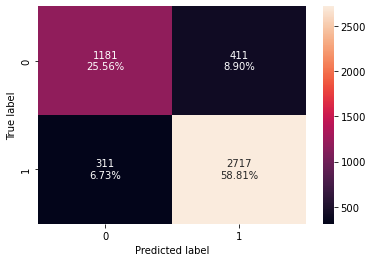

In [51]:
confusion_matrix_sklearn(model, X_test, y_test)

- We are getting good and generalized results on both the training and test sets

### Visualizing the Decision Trees

In [53]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['term_60 months', 'gender_Male', 'purpose_House', 'purpose_Medical', 'purpose_Other', 'purpose_Personal', 'purpose_Wedding', 'home_ownership_Own', 'home_ownership_Rent', 'age_>25', 'FICO_>500']


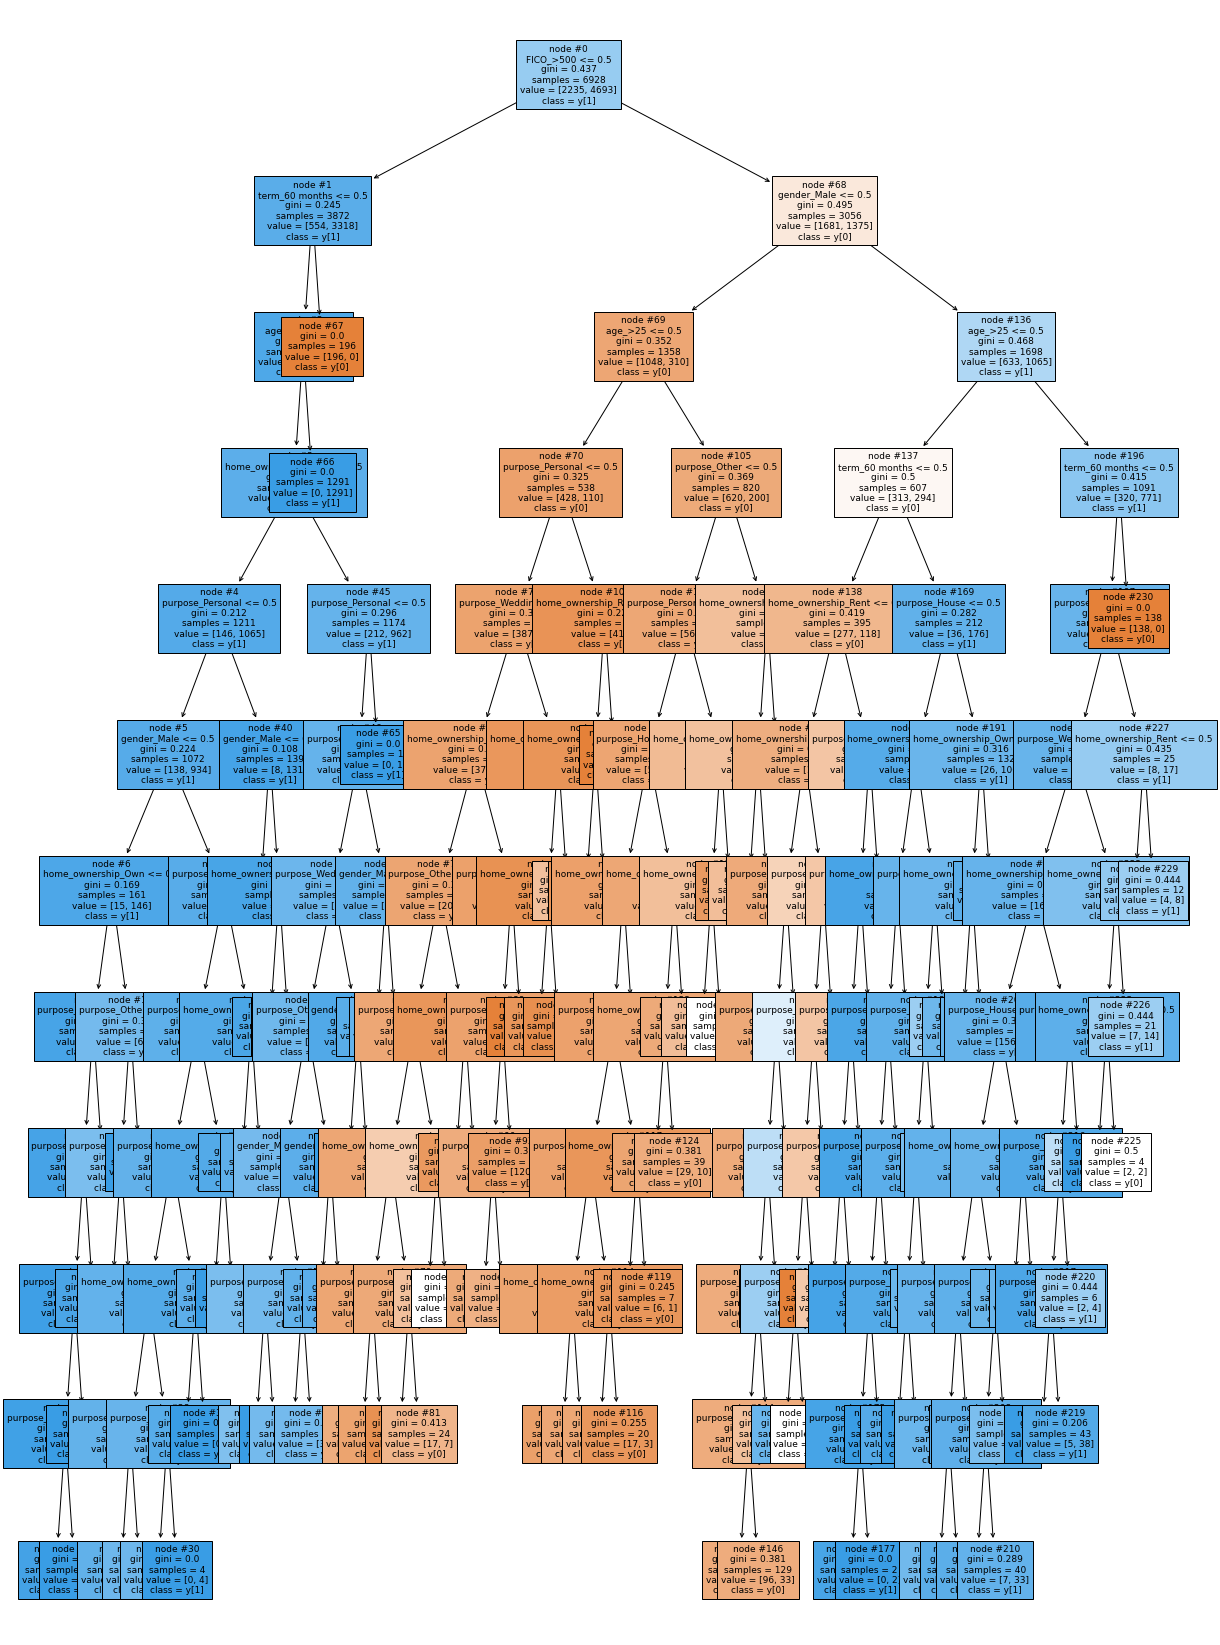

In [54]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [55]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- FICO_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- age_>25 <= 0.50
|   |   |   |--- home_ownership_Rent <= 0.50
|   |   |   |   |--- purpose_Personal <= 0.50
|   |   |   |   |   |--- gender_Male <= 0.50
|   |   |   |   |   |   |--- home_ownership_Own <= 0.50
|   |   |   |   |   |   |   |--- purpose_Medical <= 0.50
|   |   |   |   |   |   |   |   |--- purpose_House <= 0.50
|   |   |   |   |   |   |   |   |   |--- purpose_Other <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- purpose_Wedding <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 18.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- purpose_Wedding >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |   |   |   |   |   |   |--- purpose_Other >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |   |   |   |   |   |--- purpose_House >  0.50
|   |   |   |   |   |   |   |   |   |--- weight

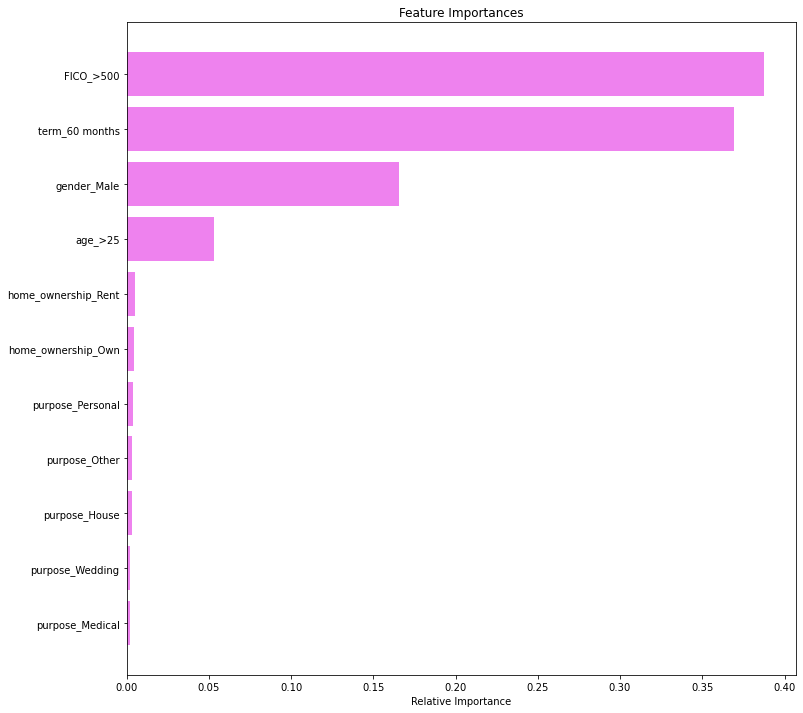

In [56]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- FICO Score, Gender nd loan duration are key determinants of deliquency

### Applying Pre Pruning on the DT
- Use of grid search for hyperparameter tuning to see if we can improve our perfomance

In [57]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

### Perfomance on training with hyper parameters after pre pruning

In [61]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.855225  0.910079   0.880256  0.894919

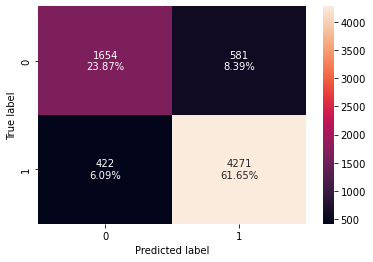

In [62]:
confusion_matrix_sklearn(estimator, X_train, y_train)

### Perfomance on test set with hyoer parameters after pre pruning

In [63]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.843939  0.898613   0.867943  0.883012

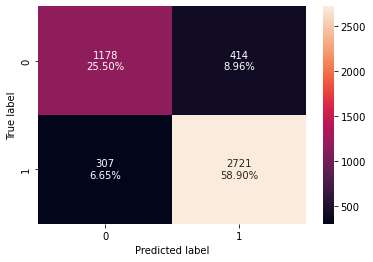

In [64]:
confusion_matrix_sklearn(estimator, X_test, y_test)

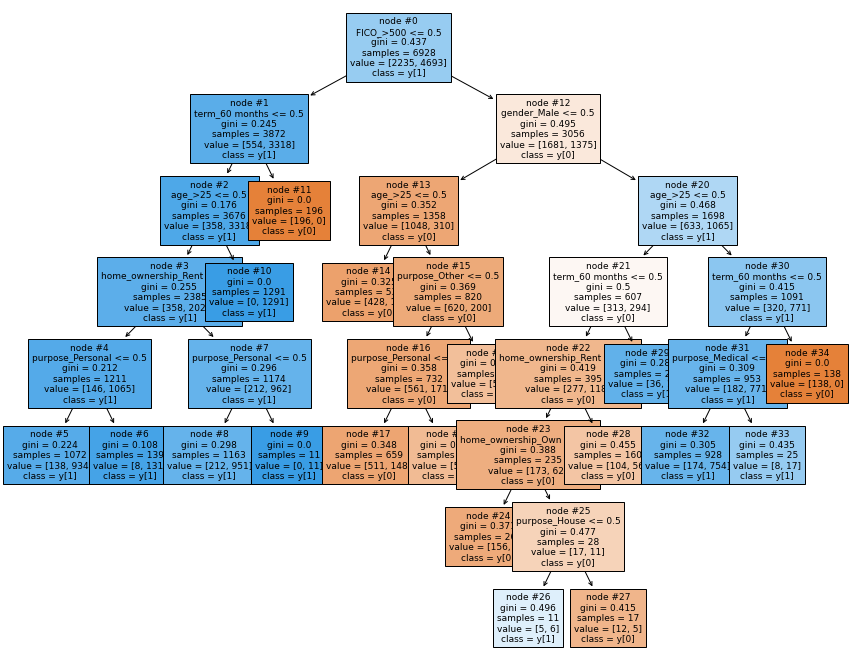

In [65]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### Post Pruning: Use of cost complexity pruning

In [66]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
pd.DataFrame(path)

ccp_alphas  impurities
0   0.000000e+00    0.226403
1   0.000000e+00    0.226403
2   2.794668e-09    0.226403
3   2.244984e-07    0.226403
4   4.918264e-07    0.226404
5   6.998390e-07    0.226404
6   7.597561e-07    0.226405
7   1.058874e-06    0.226406
8   1.184343e-06    0.226407
9   1.386119e-06    0.226409
10  2.183321e-06    0.226411
11  2.291140e-06    0.226416
12  3.665824e-06    0.226419
13  3.778517e-06    0.226423
14  4.160227e-06    0.226431
15  4.169086e-06    0.226435
16  4.245347e-06    0.226440
17  5.155064e-06    0.226445
18  5.244266e-06    0.226450
19  5.492923e-06    0.226456
20  6.045620e-06    0.226462
21  8.340601e-06    0.226470
22  8.765875e-06    0.226479
23  9.056740e-06    0.226488
24  9.751114e-06    0.226498
25  1.058022e-05    0.226519
26  1.138027e-05    0.226542
27  1.155642e-05    0.226553
28  1.156951e-05    0.226576
29  1.169925e-05    0.226600
30  1.174875e-05    0.226611
31  1.202848e-05    0.226623
32  1.323848e-05    0.226637
33  1.507632e-05    0.226652
34  1.608110e-05    0.226668
35  1.753314e-05    0.226685
36  1.979545e-05    0.226705
37  2.032168e-05    0.226725
38  2.166168e-05    0.226747
39  2.168081e-05    0.226812
40  2.216324e-05    0.226834
41  2.421893e-05    0.226931
42  2.477532e-05    0.226956
43  2.568272e-05    0.226982
44  3.132587e-05    0.227013
45  3.194772e-05    0.227077
46  3.204299e-05    0.227109
47  3.303016e-05    0.227142
48  3.424580e-05    0.227176
49  3.522919e-05    0.227211
50  3.529801e-05    0.227247
51  3.745085e-05    0.227284
52  3.999700e-05    0.227324
53  4.034344e-05    0.227566
54  4.156233e-05    0.227608
55  4.295438e-05    0.227651
56  4.320199e-05    0.227694
57  4.340672e-05    0.227737
58  5.348017e-05    0.227791
59  5.773672e-05    0.227849
60  5.995736e-05    0.227968
61  7.314108e-05    0.228115
62  7.574157e-05    0.228190
63  7.818003e-05    0.228347
64  8.769179e-05    0.228435
65  8.831375e-05    0.228523
66  9.072968e-05    0.228795
67  1.049759e-04    0.229005
68  1.076388e-04    0.229436
69  1.117546e-04    0.229771
70  1.193296e-04    0.230009
71  1.217918e-04    0.230131
72  1.233812e-04    0.230255
73  1.527711e-04    0.230407
74  1.553389e-04    0.230563
75  1.773114e-04    0.230917
76  1.799582e-04    0.231097
77  2.040456e-04    0.231301
78  6.198757e-04    0.231921
79  5.448168e-03    0.237369
80  1.124860e-02    0.248618
81  1.417137e-02    0.276961
82  3.466595e-02    0.311627
83  4.376431e-02    0.355391
84  8.167025e-02    0.437061

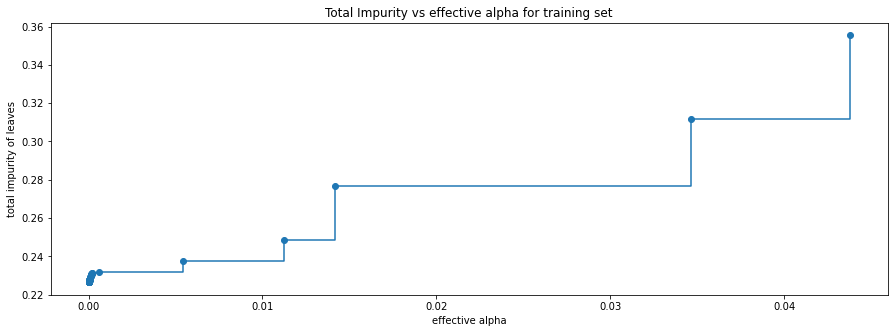

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [69]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08167024657332106


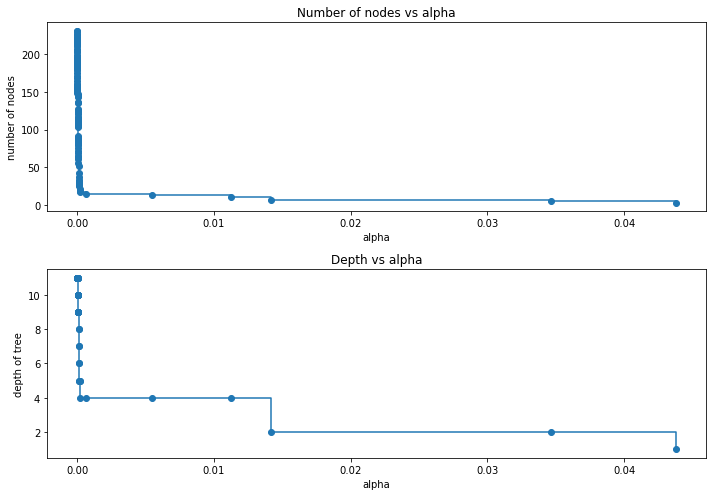

In [70]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets

In [71]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [72]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

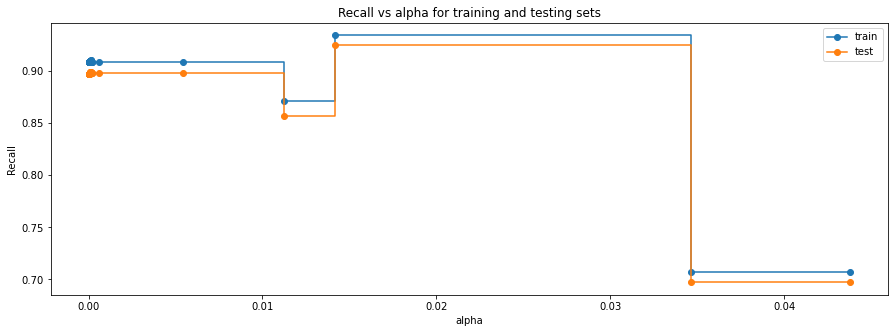

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.014171370928955346, random_state=1)


In [84]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train.T

0
Accuracy   0.812211
Recall     0.933944
Precision  0.815594
F1         0.870766

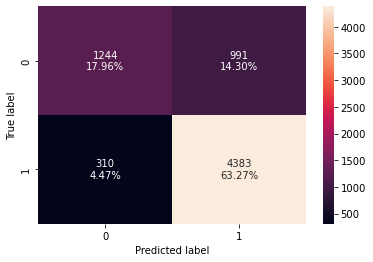

In [76]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [77]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.798052  0.924703   0.798859  0.857187

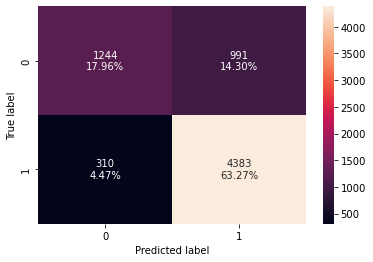

In [78]:
confusion_matrix_sklearn(best_model, X_train, y_train)

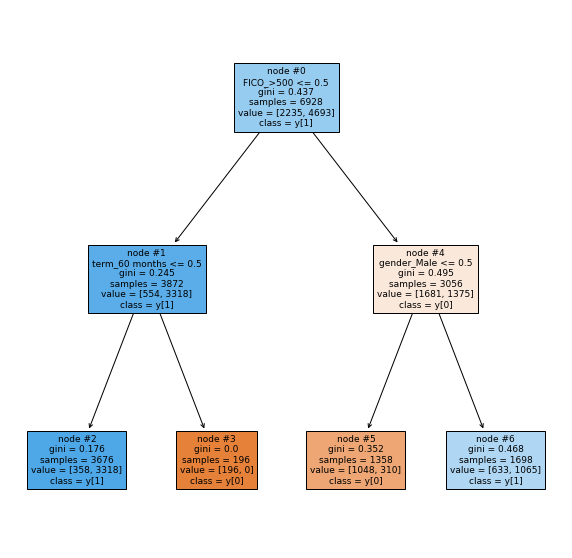

In [79]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [80]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- FICO_>500 <= 0.50
|   |--- term_60 months <= 0.50
|   |   |--- weights: [358.00, 3318.00] class: 1
|   |--- term_60 months >  0.50
|   |   |--- weights: [196.00, 0.00] class: 0
|--- FICO_>500 >  0.50
|   |--- gender_Male <= 0.50
|   |   |--- weights: [1048.00, 310.00] class: 0
|   |--- gender_Male >  0.50
|   |   |--- weights: [633.00, 1065.00] class: 1



In [81]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                          Imp
FICO_>500            0.510119
term_60 months       0.273355
gender_Male          0.216526
purpose_House        0.000000
purpose_Medical      0.000000
purpose_Other        0.000000
purpose_Personal     0.000000
purpose_Wedding      0.000000
home_ownership_Own   0.000000
home_ownership_Rent  0.000000
age_>25              0.000000


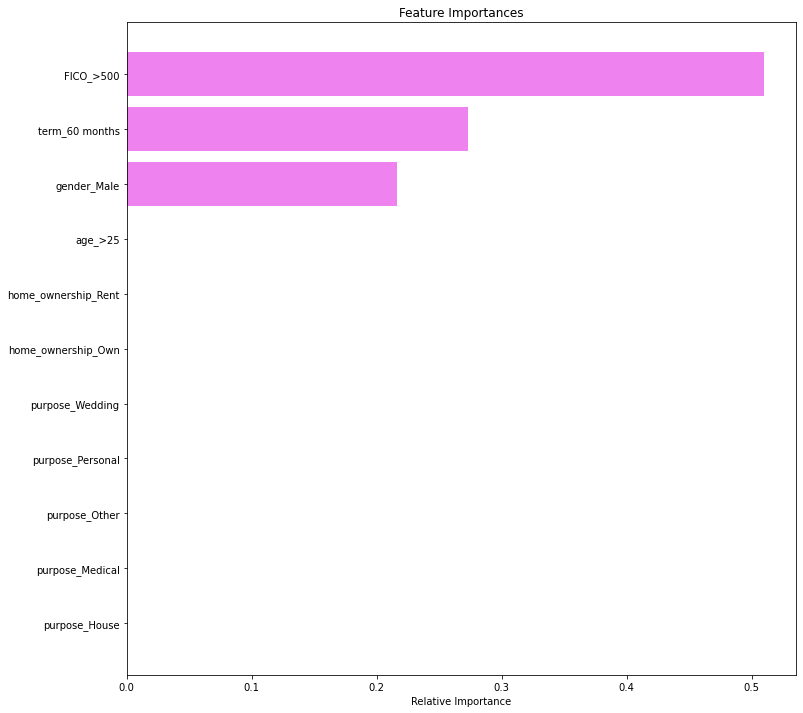

In [82]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparison of the models and decision on the final model selection

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.855514                     0.855225   
Recall                  0.908800                     0.910079   
Precision               0.881563                     0.880256   
F1                      0.894974                     0.894919   

           Decision Tree (Post-Pruning)  
Accuracy                       0.812211  
Recall                         0.933944  
Precision                      0.815594  
F1                             0.870766

In [85]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.843723                     0.843939   
Recall                  0.897292                     0.898613   
Precision               0.868606                     0.867943   
F1                      0.882716                     0.883012   

           Decision Tree (Post-Pruning)  
Accuracy                       0.798052  
Recall                         0.924703  
Precision                      0.798859  
F1                             0.857187

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Conclusions and Recommendations

* FICO, term and gender (in that order) are the most important variables in determining if a borrower will get into a delinquent stage
* No borrower shall be given a loan if they are applying for a 36 month term loan and
have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.